# Low-rank matrix recovery


In [1]:
import cvxpy as cp
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

# Make rank-r matrix
m,n = 80,40
r = 5
A = np.random.randn(m,r)@np.random.randn(r,n)

In [2]:
mis_frac = 1/2
Amis = A.flatten()
Amis[np.random.choice(np.size(A),int(np.size(A)*mis_frac),replace=False)] = np.nan
Amis = Amis.reshape(A.shape)
mis = np.isnan(Amis)
print('Total number of entries:  {}'.format(Amis.size))
print('Number of missing values: {}'.format(np.sum(mis)))
print()
print(Amis[:5,:5])

Total number of entries:  3200
Number of missing values: 1600

[[-1.3614324  -0.28746375         nan         nan         nan]
 [-0.9953219   1.18822595         nan         nan  2.15532311]
 [        nan         nan -0.12192539  0.2773868          nan]
 [        nan  4.74945314         nan  1.14201232         nan]
 [        nan  3.00418239         nan  1.77352732         nan]]


In [3]:
Arec = cp.Variable(Amis.shape)
obj = cp.normNuc(Arec)
constraints = [Arec[~mis] == Amis[~mis]]
prob = cp.Problem(cp.Minimize(obj),constraints)
prob.solve(solver=cp.SCS,verbose=False)

299.1629808013029

In [4]:
print('Relative error {}'.
      format(np.linalg.norm(Arec.value - A,'fro')/np.linalg.norm(A,'fro')))

Relative error 6.177583352362601e-05


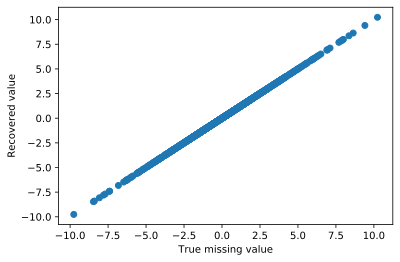

In [5]:
plt.scatter(A[mis],Arec.value[mis])
plt.xlabel('True missing value')
plt.ylabel('Recovered value')
plt.show()

In [6]:
print(cp.installed_solvers())

['ECOS', 'ECOS_BB', 'MOSEK', 'OSQP', 'SCS']


### This is another instance of $\ell_1$ magic!

In [15]:

Xc = (X - X.mean(axis=0))/X.std(axis=0)


In [16]:
Xc.mean(axis=0)

array([ 7.40148683e-17, -5.55111512e-17, -1.20274161e-16,  3.23815049e-17])